![Texto alternativo](https://laserud.co/wp-content/uploads/2020/05/cropped-LOGOLASER-1.jpg "Grupo LASER")

# Algoritmo de arbol de decisión

Es un modelo muy popular de clasificación que acepta variables cualitativas y cuantitativas para la construcción del modelo. Al entrar un poco mas en detalle el algoritmo realiza las siguientes operaciones: 

1. Una ponderación entre las variables predictoras,
2. Usar una estrategia recursiva para dividir el conjunto de datos teniendo en cuenta la ponderación de las variables predictoras.
3. La division binaria de cada nodo (ya sea raíz o de decision) facilitando su comprensión y entendimiento.

En el siguiente fragmento de código encontraremos como instalar la dependencia **sklearn** la cual contiene la implementación de los algoritmos clásicos de ML incluyendo el algoritmo de arboles de decisión; si quieres conocer a mayor detalle la implementación de la misma puedes entrar a la documentación de ella <a href="https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html">aquí</a>

In [1]:
!pip install sklearn

You should consider upgrading via the 'c:\users\usuario\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


Ahora vamos a agregar la librería que contiene el modelo de arboles de decision y la librería datetime, puesto que vamos a crear una función **desicion_tree_algorithm** que recibe como parametro las variables **train_data, x_variables, y_variable** que hacen referencia el conjunto de datos de entrenamiento, los nombres de las columnas asociadas a las variables independientes y la variable dependiente (razón de ser de la predicción) respectivamente; la cual debe retornar el modelo entrenado y el tiempo en milisegundos que tomo dicho entrenamiento.

In [2]:
from sklearn import tree

import datetime

def decision_tree_algorithm(train_data, x_variables, y_variable):
    x_train = train_data[x_variables]
    y_train = train_data[[y_variable]]
    
    start_time = datetime.datetime.now()
    
    model = tree.DecisionTreeClassifier(random_state=0)
    model = model.fit(x_train,y_train.values.ravel())
    
    elapsed_time = datetime.datetime.now() - start_time
    
    return model, (elapsed_time.total_seconds() * 1000)


En los siguientes fragmentos de código se procede rápidamente con la carga, preparación y análisis exploratorio de los datos correspondientes a <a href="https://archive.ics.uci.edu/ml/datasets/zoo" target="_blank">Zoo Data Set</a>; para mas información sobre el detalle y paso a paso de los procedimientos realizados puedes dirigirte a la sección de <a href="https://colab.research.google.com/github/LASER-UD/machinelearning/blob/main/PreparacionDatos.ipynb" target="_blank">Preparación de los datos</a> y  <a href="https://colab.research.google.com/github/LASER-UD/machinelearning/blob/main/AnalisisExploratorio.ipynb" target="_blank">Ánalisis exploratorio</a>

In [3]:
!pip install pandas
!pip install requests

import pandas as pd
import requests

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

import requests

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/zoo/zoo.data"
data_stream = requests.get(url).content

import io

headers = ['animal_name', 'hair', 'feathers', 'eggs', 'milk', 'airbone', 'aquatic', 'predator', 'toother', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail', 'domestic', 'catsize', 'type']
dataset=pd.read_csv(io.StringIO(data_stream.decode('utf-8')), header=None, names = headers)

dataset

You should consider upgrading via the 'c:\users\usuario\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\usuario\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


animal_name  hair  feathers  eggs  milk  airbone  aquatic  predator  \
0      aardvark     1         0     0     1        0        0         1   
1      antelope     1         0     0     1        0        0         0   
2          bass     0         0     1     0        0        1         1   
3          bear     1         0     0     1        0        0         1   
4          boar     1         0     0     1        0        0         1   
..          ...   ...       ...   ...   ...      ...      ...       ...   
96      wallaby     1         0     0     1        0        0         0   
97         wasp     1         0     1     0        1        0         0   
98         wolf     1         0     0     1        0        0         1   
99         worm     0         0     1     0        0        0         0   
100        wren     0         1     1     0        1        0         0   

     toother  backbone  breathes  venomous  fins  legs  tail  domestic  \
0          1         1         1         0     0     4     0         0   
1          1         1         1         0     0     4     1         0   
2          1         1         0         0     1     0     1         0   
3          1         1         1         0     0     4     0         0   
4          1         1         1         0     0     4     1         0   
..       ...       ...       ...       ...   ...   ...   ...       ...   
96         1         1         1         0     0     2     1         0   
97         0         0         1         1     0     6     0         0   
98         1         1         1         0     0     4     1         0   
99         0         0         1         0     0     0     0         0   
100        0         1         1         0     0     2     1         0   

     catsize  type  
0          1     1  
1          1     1  
2          0     4  
3          1     1  
4          1     1  
..       ...   ...  
96         1     1  
97         0     6  
98         1     1  
99         0     7  
100        0     2  

[101 rows x 18 columns]

In [4]:
x_columns =  ['hair', 'feathers', 'eggs', 'milk', 'airbone', 'aquatic', 'predator', 'toother', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail', 'domestic', 'catsize']
target_column_name = 'type'
y_columns = [target_column_name]
target_classes_name = ['1', '2', '3', '4', '5', '6', '7']

Ahora vamos a definir el conjunto de datos que usaremos para el entrenamiento y validación del modelo de arboles de decisión con el siguiente fragmento de código:

In [5]:
# El primer parámetro nos va a servir para tomar X porcentaje de los datos por ejemplo 0.6 quiere decir el 60% de los datos
train_data=dataset.sample(frac=0.6)
# Lo que se hace aca es tomar los elementos del conjunto de datos que no se encuentran en el conjunto de entrenamiento
test_data=dataset.drop(train_data.index)

Para el análisis estadístico se excluiran las observaciones (registros) que se encuentren en el conjunto de datos de validación; ya que en ocasiones nos podrían decir **X** es la base de datos de entrenamiento, y **Y** es la base de datos de validación

In [6]:
train_data.describe()

hair   feathers       eggs       milk    airbone    aquatic  \
count  61.000000  61.000000  61.000000  61.000000  61.000000  61.000000   
mean    0.426230   0.196721   0.590164   0.393443   0.245902   0.344262   
std     0.498632   0.400819   0.495885   0.492568   0.434194   0.479070   
min     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
25%     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
50%     0.000000   0.000000   1.000000   0.000000   0.000000   0.000000   
75%     1.000000   0.000000   1.000000   1.000000   0.000000   1.000000   
max     1.000000   1.000000   1.000000   1.000000   1.000000   1.000000   

        predator    toother   backbone   breathes   venomous       fins  \
count  61.000000  61.000000  61.000000  61.000000  61.000000  61.000000   
mean    0.491803   0.573770   0.803279   0.803279   0.114754   0.147541   
std     0.504082   0.498632   0.400819   0.400819   0.321370   0.357588   
min     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
25%     0.000000   0.000000   1.000000   1.000000   0.000000   0.000000   
50%     0.000000   1.000000   1.000000   1.000000   0.000000   0.000000   
75%     1.000000   1.000000   1.000000   1.000000   0.000000   0.000000   
max     1.000000   1.000000   1.000000   1.000000   1.000000   1.000000   

            legs       tail   domestic    catsize       type  
count  61.000000  61.000000  61.000000  61.000000  61.000000  
mean    2.918033   0.737705   0.147541   0.409836   2.934426  
std     2.084027   0.443533   0.357588   0.495885   2.174618  
min     0.000000   0.000000   0.000000   0.000000   1.000000  
25%     2.000000   0.000000   0.000000   0.000000   1.000000  
50%     4.000000   1.000000   0.000000   0.000000   2.000000  
75%     4.000000   1.000000   0.000000   1.000000   4.000000  
max     8.000000   1.000000   1.000000   1.000000   7.000000

In [7]:
train_data.corr(method='pearson')

hair  feathers      eggs      milk   airbone   aquatic  \
hair      1.000000 -0.426526 -0.764653  0.866583 -0.107269 -0.484960   
feathers -0.426526  1.000000  0.412393 -0.398563  0.579313 -0.011383   
eggs     -0.764653  0.412393  1.000000 -0.898231  0.321052  0.393337   
milk      0.866583 -0.398563 -0.898231  1.000000 -0.304051 -0.371671   
airbone  -0.107269  0.579313  0.321052 -0.304051  1.000000 -0.173384   
aquatic  -0.484960 -0.011383  0.393337 -0.371671 -0.173384  1.000000   
predator -0.184794 -0.074376  0.019675 -0.053920 -0.409457  0.391467   
toother   0.474725 -0.574169 -0.650839  0.626298 -0.508581  0.066339   
backbone  0.176352  0.244898 -0.328540  0.398563 -0.100477  0.098179   
breathes  0.426526  0.244898 -0.328540  0.398563  0.282592 -0.596191   
venomous -0.102302 -0.178174  0.090868 -0.289973  0.033287  0.172142   
fins     -0.265096 -0.205879  0.158706 -0.145814 -0.237567  0.574169   
legs      0.387029 -0.219805 -0.210449  0.194300  0.041065 -0.355215   
tail      0.061771  0.295084 -0.269570  0.251376 -0.005675  0.039862   
domestic  0.389215 -0.089596 -0.311248  0.327305 -0.022877 -0.301439   
catsize   0.360226 -0.160833 -0.390000  0.488825 -0.398459  0.027603   
type     -0.542500 -0.214409  0.623797 -0.722376 -0.000289  0.262001   

          predator   toother  backbone  breathes  venomous      fins  \
hair     -0.184794  0.474725  0.176352  0.426526 -0.102302 -0.265096   
feathers -0.074376 -0.574169  0.244898  0.244898 -0.178174 -0.205879   
eggs      0.019675 -0.650839 -0.328540 -0.328540  0.090868  0.158706   
milk     -0.053920  0.626298  0.398563  0.398563 -0.289973 -0.145814   
airbone  -0.409457 -0.508581 -0.100477  0.282592  0.033287 -0.237567   
aquatic   0.391467  0.066339  0.098179 -0.596191  0.172142  0.574169   
predator  1.000000  0.118485  0.074376 -0.338073  0.160227  0.237977   
toother   0.118485  1.000000  0.574169 -0.092961 -0.105712  0.358569   
backbone  0.074376  0.574169  1.000000  0.170068 -0.339379  0.205879   
breathes -0.338073 -0.092961  0.170068  1.000000 -0.209991 -0.608106   
venomous  0.160227 -0.105712 -0.339379 -0.209991  1.000000 -0.004755   
fins      0.237977  0.358569  0.205879 -0.608106 -0.004755  1.000000   
legs     -0.087909 -0.130412 -0.338865  0.419330  0.088934 -0.542619   
tail      0.139315  0.315031  0.736174  0.079919 -0.253024  0.248069   
domestic -0.316798  0.171623  0.089596  0.205879 -0.004755 -0.173077   
catsize   0.247028  0.313817  0.328540  0.076980 -0.195451  0.123267   
type      0.060318 -0.471947 -0.837263 -0.454836  0.416371  0.076948   

              legs      tail  domestic   catsize      type  
hair      0.387029  0.061771  0.389215  0.360226 -0.542500  
feathers -0.219805  0.295084 -0.089596 -0.160833 -0.214409  
eggs     -0.210449 -0.269570 -0.311248 -0.390000  0.623797  
milk      0.194300  0.251376  0.327305  0.488825 -0.722376  
airbone   0.041065 -0.005675 -0.022877 -0.398459 -0.000289  
aquatic  -0.355215  0.039862 -0.301439  0.027603  0.262001  
predator -0.087909  0.139315 -0.316798  0.247028  0.060318  
toother  -0.130412  0.315031  0.171623  0.313817 -0.471947  
backbone -0.338865  0.736174  0.089596  0.328540 -0.837263  
breathes  0.419330  0.079919  0.205879  0.076980 -0.454836  
venomous  0.088934 -0.253024 -0.004755 -0.195451  0.416371  
fins     -0.542619  0.248069 -0.173077  0.123267  0.076948  
legs      1.000000 -0.276081  0.217781  0.081430  0.094411  
tail     -0.276081  1.000000  0.037900  0.269570 -0.657484  
domestic  0.217781  0.037900  1.000000  0.123267 -0.244547  
catsize   0.081430  0.269570  0.123267  1.000000 -0.438330  
type      0.094411 -0.657484 -0.244547 -0.438330  1.000000

c:\users\usuario\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\usuario\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\usuario\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\usuario\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\usuario\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, Use

c:\users\usuario\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\usuario\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\usuario\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\usuario\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\usuario\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, Use

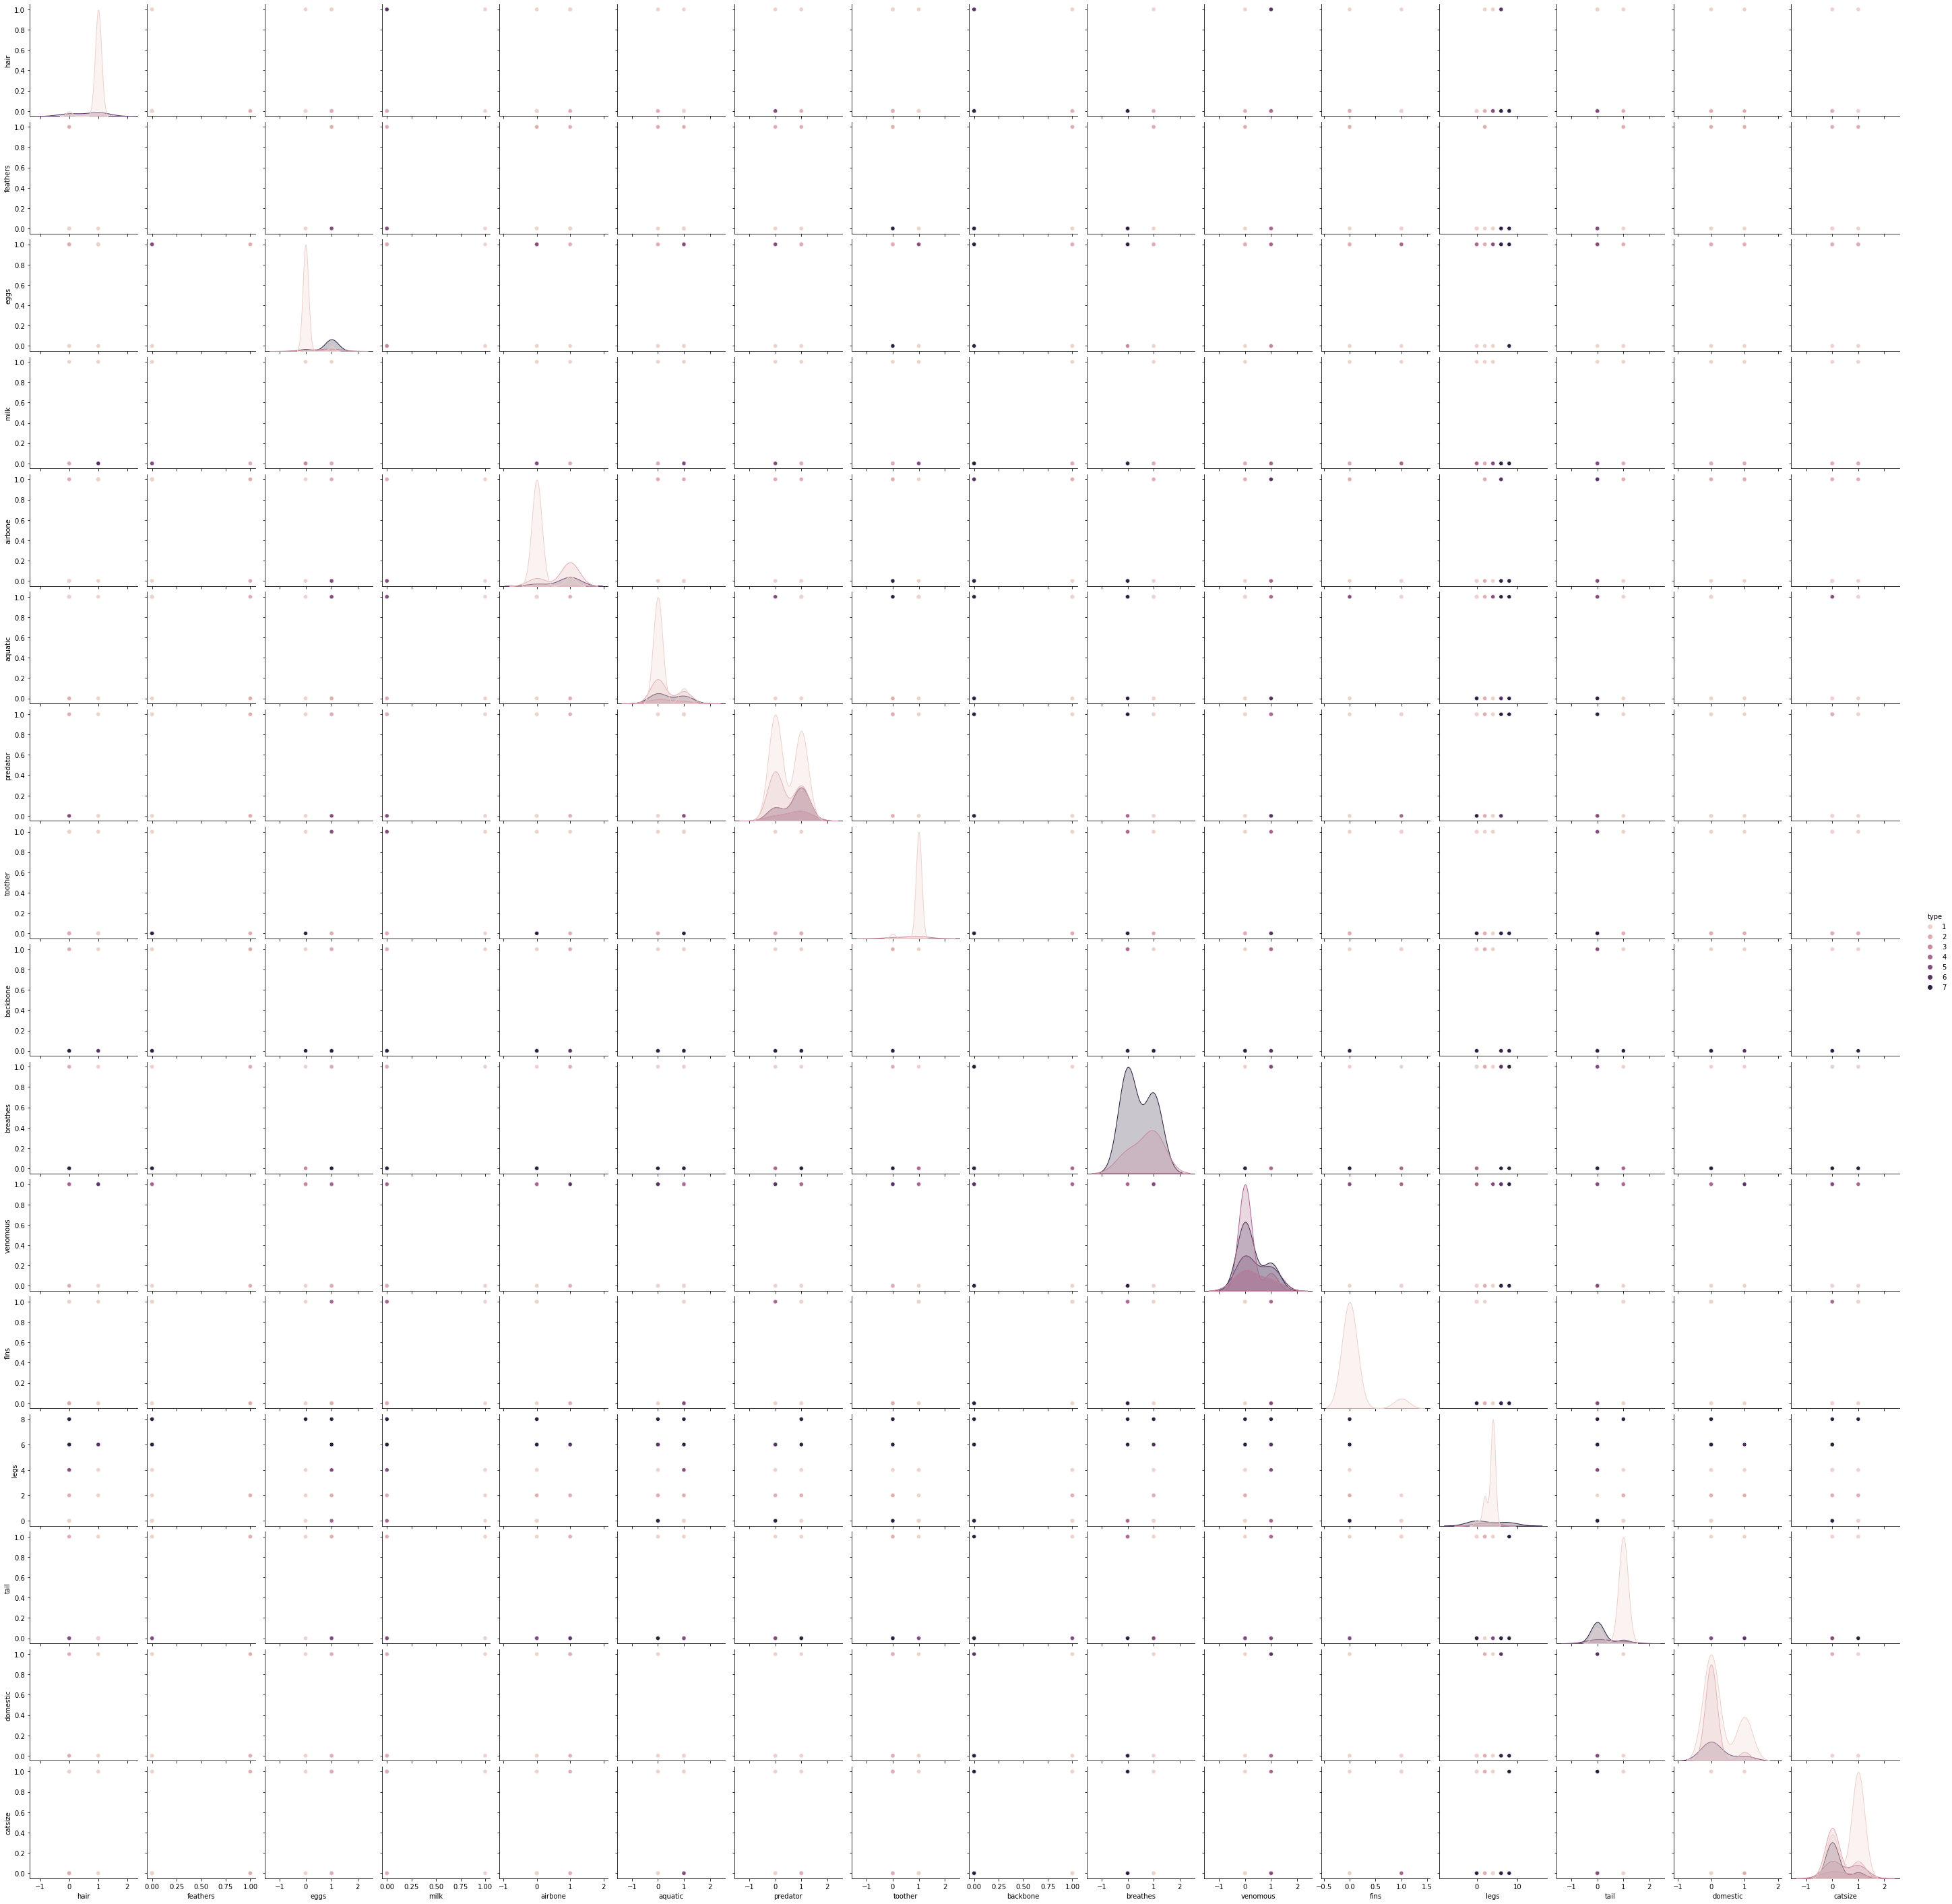

In [8]:

import seaborn as sns
import matplotlib.pyplot as plt
g = sns.pairplot(train_data, hue=target_column_name)
plt.show()

**Nota.** Es importante recordar los pasos para el procesamiento de datos. Esto aplica para absolutamente todos los métodos que quisieramos utilizar.
* Obtención de los datos
* Preparación de los datos
* Definición del conjunto de datos de entrenamiento (con el que se va a construir el modelo)
* Definición del conjunto de datos de prueba (con el que se validara la confianza del modelo)
* Selección del algoritmo con el que se construye el modelo
* Entrenamiento del modelo
* Validacion del modelo (esto incluye revisar los resultados de la ejecución del modelo con los datos de prueba y la toma de medidas para establecer la confianza del modelo)

Con el siguiente fragmento de código vamos a proceder con el llamado a la funcion **decision_tree_algorithm** definida previamente en esta guía, pasando como parametros:
1. El conjunto de datos de entrenamiento
2. Las los atributos asociados a las variables independientes que se usaran para el entrenamiento del modelo
3. La el nombre del atributo asociado a la variable dependiente que queremos predecir a partir de la información que pueda extraer el algorítmo de las demas variables

In [9]:
# En la siguiente linea vamos a marcar los nombres de las variables independientes
x_columns = ['hair', 'feathers', 'eggs', 'milk', 'airbone', 'aquatic', 'predator', 'toother', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail', 'domestic', 'catsize']
y_column = 'type'
model, train_elapsed_time = decision_tree_algorithm(train_data, x_columns, y_column)

En el siguiente fragmento de código encontraremos como mostrar gráficamente las reglas de inferencia para realizar la predicción generadas por el algoritmo.

[Text(273.92727272727274, 203.85, 'milk <= 0.5\ngini = 0.769\nsamples = 61\nvalue = [24, 12, 3, 7, 3, 5, 7]\nclass = 1'),
 Text(243.4909090909091, 176.67000000000002, 'feathers <= 0.5\ngini = 0.792\nsamples = 37\nvalue = [0, 12, 3, 7, 3, 5, 7]\nclass = 2'),
 Text(213.05454545454546, 149.49, 'fins <= 0.5\ngini = 0.774\nsamples = 25\nvalue = [0, 0, 3, 7, 3, 5, 7]\nclass = 4'),
 Text(182.61818181818182, 122.31, 'backbone <= 0.5\ngini = 0.716\nsamples = 18\nvalue = [0, 0, 3, 0, 3, 5, 7]\nclass = 7'),
 Text(121.74545454545455, 95.13, 'airbone <= 0.5\ngini = 0.486\nsamples = 12\nvalue = [0, 0, 0, 0, 0, 5, 7]\nclass = 7'),
 Text(91.30909090909091, 67.94999999999999, 'predator <= 0.5\ngini = 0.219\nsamples = 8\nvalue = [0, 0, 0, 0, 0, 1, 7]\nclass = 7'),
 Text(60.872727272727275, 40.77000000000001, 'legs <= 3.0\ngini = 0.444\nsamples = 3\nvalue = [0, 0, 0, 0, 0, 1, 2]\nclass = 7'),
 Text(30.436363636363637, 13.590000000000003, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 0, 0, 0, 0, 2]\nclass = 7'

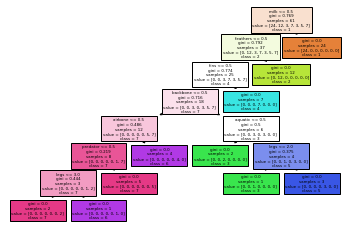

In [10]:
import matplotlib.pyplot as plt

target_class_names = ['1', '2', '3', '4', '5', '6', '7']

tree.plot_tree(model, filled=True, feature_names = x_columns, class_names = target_class_names)

Ahora vamos a pasarle al modelo el conjunto de validación y así ver como son las predicciones realizadas.

In [11]:
start_time = datetime.datetime.now()

predictions = model.predict(test_data[x_columns])
elapsed_time = datetime.datetime.now() - start_time
test_elapsed_time = elapsed_time.total_seconds() * 1000
predictions

array([1, 4, 1, 1, 1, 4, 4, 7, 2, 1, 2, 1, 2, 5, 1, 4, 1, 4, 6, 6, 1, 7,
       1, 1, 1, 1, 2, 2, 3, 1, 1, 1, 2, 2, 3, 7, 6, 4, 2, 1], dtype=int64)

Ahora vamos a validar el modelo creando la función **extract_error_measures** que recibe como parametros **expected_test_outputs, predictions** los cuales hacen referencia a los valores esperados de la predicción y los valores resultantes de la predicción del modelo respectivamente; y retorna las variables **test_mean_absolute_error, test_mean_squared_error** las cuales hacen referencia a la medida del error medio absoluto y el error cuadratico medio respectivamente. Los cuales nos ayudan a comprender la efectividad y confianza del modelo.

In [12]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

def extract_error_measures(expected_test_outputs, predictions):
    test_mean_absolute_error = mean_absolute_error(expected_test_outputs, predictions)
    test_mean_squared_error = mean_squared_error(expected_test_outputs, predictions)
    return test_mean_absolute_error, test_mean_squared_error

Para efectos de presentación de resultados definiremos la variable **algorithm_scores** la cual tiene una estructura de tabla con los campos retornados en la función **extract_error_measures**, junto con el tiempo en milisegundos que tomo la construcción del modelo y la ejecución de todos los elementos de prueba.

In [13]:
import pandas as pd

algorithm_scores = pd.DataFrame(columns=['algorithm','mean_absolute_error', 'mean_squared_error', 'train_elapsed_time', 'test_elapsed_time'])

Ahora vamos a agregarle a la tabla de resultados las medidas de interés tomadas del modelo; para ello llamaremos la función **extract_error_measures**

In [14]:
test_mean_absolute_error, test_mean_squared_error = extract_error_measures(predictions, test_data[y_column])
algorithm_scores.loc[len(algorithm_scores)] = ['Arboles de decisión', test_mean_absolute_error, test_mean_squared_error, train_elapsed_time, test_elapsed_time]


In [15]:
algorithm_scores

algorithm  mean_absolute_error  mean_squared_error  \
0  Arboles de decisión                  0.0                 0.0   

   train_elapsed_time  test_elapsed_time  
0               8.002             10.008